Train: 1.000, Test: 0.771


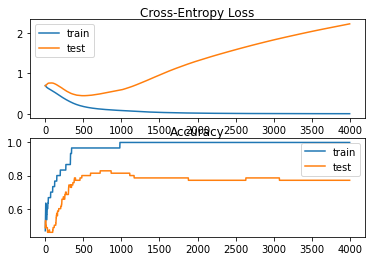

In [1]:
# mlp overfit on the two circles dataset
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
trainX, testX = X[: n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Epoch 2: early stopping
Train: 0.567, Test: 0.443


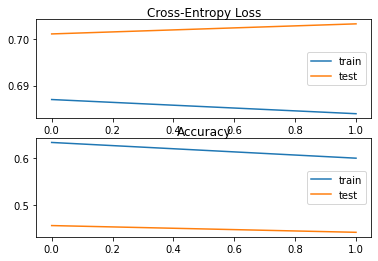

In [2]:
from keras.callbacks import EarlyStopping

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Epoch 689: early stopping
Train: 0.967, Test: 0.829


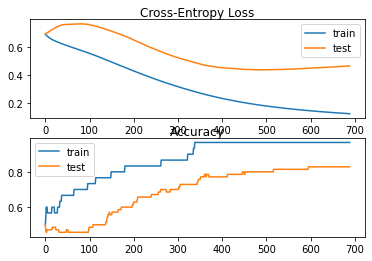

In [3]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [6]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])

# load the saved model
saved_model = load_model('best_model.h5')

# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Epoch 1: val_accuracy improved from -inf to 0.52857, saving model to best_model.h5

Epoch 2: val_accuracy did not improve from 0.52857

Epoch 3: val_accuracy did not improve from 0.52857

Epoch 4: val_accuracy did not improve from 0.52857

Epoch 5: val_accuracy did not improve from 0.52857

Epoch 6: val_accuracy did not improve from 0.52857

Epoch 7: val_accuracy did not improve from 0.52857

Epoch 8: val_accuracy did not improve from 0.52857

Epoch 9: val_accuracy did not improve from 0.52857

Epoch 10: val_accuracy did not improve from 0.52857

Epoch 11: val_accuracy did not improve from 0.52857

Epoch 12: val_accuracy did not improve from 0.52857

Epoch 13: val_accuracy did not improve from 0.52857

Epoch 14: val_accuracy did not improve from 0.52857

Epoch 15: val_accuracy did not improve from 0.52857

Epoch 16: val_accuracy did not improve from 0.52857

Epoch 17: val_accuracy did not improve from 0.52857

Epoch 18: val_accuracy did not improve from 0.52857

Epoch 19: val_accuracy


Epoch 153: val_accuracy did not improve from 0.55714

Epoch 154: val_accuracy did not improve from 0.55714

Epoch 155: val_accuracy did not improve from 0.55714

Epoch 156: val_accuracy did not improve from 0.55714

Epoch 157: val_accuracy did not improve from 0.55714

Epoch 158: val_accuracy did not improve from 0.55714

Epoch 159: val_accuracy did not improve from 0.55714

Epoch 160: val_accuracy improved from 0.55714 to 0.57143, saving model to best_model.h5

Epoch 161: val_accuracy did not improve from 0.57143

Epoch 162: val_accuracy improved from 0.57143 to 0.58571, saving model to best_model.h5

Epoch 163: val_accuracy did not improve from 0.58571

Epoch 164: val_accuracy improved from 0.58571 to 0.60000, saving model to best_model.h5

Epoch 165: val_accuracy did not improve from 0.60000

Epoch 166: val_accuracy did not improve from 0.60000

Epoch 167: val_accuracy did not improve from 0.60000

Epoch 168: val_accuracy did not improve from 0.60000

Epoch 169: val_accuracy did no


Epoch 298: val_accuracy did not improve from 0.71429

Epoch 299: val_accuracy did not improve from 0.71429

Epoch 300: val_accuracy did not improve from 0.71429

Epoch 301: val_accuracy did not improve from 0.71429

Epoch 302: val_accuracy did not improve from 0.71429

Epoch 303: val_accuracy did not improve from 0.71429

Epoch 304: val_accuracy did not improve from 0.71429

Epoch 305: val_accuracy did not improve from 0.71429

Epoch 306: val_accuracy did not improve from 0.71429

Epoch 307: val_accuracy did not improve from 0.71429

Epoch 308: val_accuracy did not improve from 0.71429

Epoch 309: val_accuracy did not improve from 0.71429

Epoch 310: val_accuracy did not improve from 0.71429

Epoch 311: val_accuracy improved from 0.71429 to 0.72857, saving model to best_model.h5

Epoch 312: val_accuracy did not improve from 0.72857

Epoch 313: val_accuracy did not improve from 0.72857

Epoch 314: val_accuracy did not improve from 0.72857

Epoch 315: val_accuracy did not improve from 0


Epoch 447: val_accuracy did not improve from 0.78571

Epoch 448: val_accuracy improved from 0.78571 to 0.80000, saving model to best_model.h5

Epoch 449: val_accuracy did not improve from 0.80000

Epoch 450: val_accuracy did not improve from 0.80000

Epoch 451: val_accuracy did not improve from 0.80000

Epoch 452: val_accuracy did not improve from 0.80000

Epoch 453: val_accuracy did not improve from 0.80000

Epoch 454: val_accuracy did not improve from 0.80000

Epoch 455: val_accuracy did not improve from 0.80000

Epoch 456: val_accuracy did not improve from 0.80000

Epoch 457: val_accuracy did not improve from 0.80000

Epoch 458: val_accuracy did not improve from 0.80000

Epoch 459: val_accuracy did not improve from 0.80000

Epoch 460: val_accuracy did not improve from 0.80000

Epoch 461: val_accuracy did not improve from 0.80000

Epoch 462: val_accuracy did not improve from 0.80000

Epoch 463: val_accuracy did not improve from 0.80000

Epoch 464: val_accuracy did not improve from 0


Epoch 599: val_accuracy did not improve from 0.81429

Epoch 600: val_accuracy did not improve from 0.81429

Epoch 601: val_accuracy did not improve from 0.81429

Epoch 602: val_accuracy did not improve from 0.81429

Epoch 603: val_accuracy did not improve from 0.81429

Epoch 604: val_accuracy did not improve from 0.81429

Epoch 605: val_accuracy did not improve from 0.81429

Epoch 606: val_accuracy did not improve from 0.81429

Epoch 607: val_accuracy did not improve from 0.81429

Epoch 608: val_accuracy did not improve from 0.81429

Epoch 609: val_accuracy did not improve from 0.81429

Epoch 610: val_accuracy did not improve from 0.81429

Epoch 611: val_accuracy did not improve from 0.81429

Epoch 612: val_accuracy did not improve from 0.81429

Epoch 613: val_accuracy did not improve from 0.81429

Epoch 614: val_accuracy did not improve from 0.81429

Epoch 615: val_accuracy did not improve from 0.81429

Epoch 616: val_accuracy did not improve from 0.81429

Epoch 617: val_accuracy did